## Sentiment Analysis of Real-time Flipkart Product Reviews

### Objective
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

### Dataset
A team of Data Engineers have already scraped real-time data from Flipkart website. They followed the instructions given in this documentation for extracting user reviews. Don’t scrape your own data. Use the dataset given below to solve the problem statement.
<a href = "reviews_data_dump/reviews_badminton/data.csv">Click Here to download the data.</a>

The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.

### Data Preprocessing
1. Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.
2. Text Normalization: Perform lemmatization or stemming to reduce words to their base forms.
3. Numerical Feature Extraction: Apply techniques like Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), Word2Vec (W2V), and BERT models for feature extraction.

### Modeling Approach
1. Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
2. Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.


### Model Deployment
1. Flask or Streamlit App Development: Develop a Flask or Streamlit web application that takes user input in the form of a review and generates the sentiment (positive or negative) of the review.
2. Model Integration: Integrate the trained sentiment classification model into the Flask or Streamlit app for real-time inference.
3. Deployment: Deploy the Flask or Streamlit app on an AWS EC2 instance to make it accessible over the internet.

### Workflow
1. Data Loading and Analysis: Gain insights into product features that contribute to customer satisfaction or dissatisfaction.
2. Data Cleaning: Preprocess the review text by removing noise and normalizing the text.
3. Text Embedding: Experiment with different text embedding techniques to represent the review text as numerical vectors.
4. Model Training: Train machine learning and deep learning models on the embedded text data to classify sentiment.
5. Model Evaluation: Evaluate the performance of the trained models using the F1-Score metric.
6. Flask or Streamlit App Development: Develop a Flask or Streamlit web application for sentiment analysis of user-provided reviews.
7. Model Deployment: Deploy the trained sentiment classification model along with the Flask or Streamlit app on an AWS EC2 instance.
8. Testing and Monitoring: Test the deployed application and monitor its performance for any issues or errors.




### 1.Data Loading and Analysis

In [113]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [114]:
# Load the dataset
data = pd.read_csv("reviews_data_dump/reviews_badminton/data.csv")
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [115]:
# print various attributes available in the dataset
data.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [116]:
# print properties of attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [117]:
# Determine the shape of the DataFrame
data.shape

(8518, 8)

In [118]:
# check the number of null values per column
data.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [119]:
# replace null values with nan
data.replace('',np.nan,inplace=True)

In [120]:
# drop nan values in the data
data.dropna(axis=0, how='any', inplace=True) # or directly data.dropna()

In [121]:
# check the number of null values per column replacing with nan and dropping nan
print(data.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [123]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

# Method 1: Using numpy's where function
data['sentiment'] = np.where(data['Ratings'] == 5.0, 1,
                              np.where(data['Ratings'] == 4.0, 1, 0))

In [124]:
# Method 2: Using pandas' map function
# Create a dictionary mapping star ratings to sentiments
rating_sentiment_map = {5.0: 1, 4.0: 1, 1.0: 0, 2.0: 0, 3.0: 0}

# Map star ratings to sentiments using the dictionary
data['sentiment'] = data['Ratings'].map(rating_sentiment_map)

In [125]:
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


### Step 1: Identify Input and Output

In [126]:
# Step 1: Identify Input and Output
X = data["Review text"]
y = data["sentiment"]

In [127]:
X

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review text, Length: 8013, dtype: object

### Step 2: Split the data into training and testing sets

In [128]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [129]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6410,)
Shape of X_test: (1603,)
Shape of y_train: (6410,)
Shape of y_test: (1603,)


### Step 3: Data Preprocessing on train data (X_train)


In [130]:
# Step 3: Data Preprocessing on train data (X_train)
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [131]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
# Apply text cleaning to the X_train
X_train_cleaned = X_train.apply(clean_text)

In [133]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_words)

In [134]:
nltk.download('punkt') # nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [135]:
# Apply lemmatization to the X_train_cleaned
X_train_cleaned = X_train_cleaned.apply(lemmatize_text)
X_train_cleaned

4201                                          awesomeread
1585                                     good productread
1692       great product highly recommended practice read
5742                                    worst qualityread
8127                                 good value moneyread
                              ...                        
8406                  product good got best price fk read
5652                                             goodread
4440                                            superread
254     love really guudas well fantastic delivery ear...
5617                                             goodread
Name: Review text, Length: 6410, dtype: object

In [136]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# use it to extract features from cleaned training data
%time X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_cleaned)

print(X_train_tfidf.shape)


CPU times: total: 31.2 ms
Wall time: 66.2 ms
(6410, 2614)


### Step 4 - Data Preprocessing on test data (X_test)

In [137]:
# Apply text cleaning to the X_test
X_test_cleaned = X_test.apply(clean_text)

# Apply lemmatization to the X_test_cleaned
X_test_cleaned = X_test_cleaned.apply(lemmatize_text)
X_test_cleaned

3350             bought flipkart totally bought priceread
2414                                         expectedread
6751                                             goodread
8367                                             niceread
5773                                         good nowread
                              ...                        
7639                 timely delivery product expectedread
2143                                             goodread
3564    good product quality practice shuttle work min...
2634                                             goodread
1359                                             niceread
Name: Review text, Length: 1603, dtype: object

In [138]:
# Transform the cleaned X test data
%time X_test_tfidf = tfidf_vectorizer.fit_transform(X_test_cleaned)

print(X_test_tfidf.shape)

CPU times: total: 15.6 ms
Wall time: 31.5 ms
(1603, 1062)


## Naive Bayes Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [139]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

# Train the classifier
nb= MultinomialNB()
%time nb.fit(X_train_tfidf, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 4.24 ms


MultinomialNB()

### Step 6 - Evaluating on Train Data

In [140]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_train_pred = nb.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8897035881435258
f1_score: 0.8757718271824354
confusion matrix:
 [[ 599  645]
 [  62 5104]]


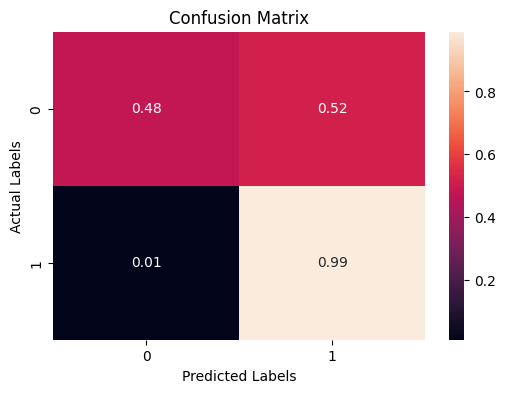

In [141]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [142]:
# Step-5: Test the model on test data
%time nb.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 2.8 ms


MultinomialNB()

In [143]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = nb.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8895820336868372
f1_score: 0.8716879595436904
confusion matrix:
 [[ 133  174]
 [   3 1293]]


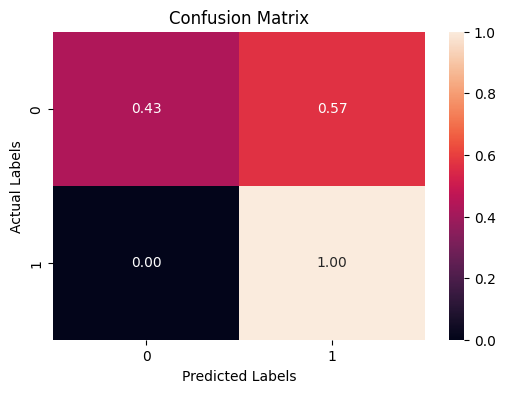

In [144]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Support Vector Classifiers Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [145]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear')

%time svm.fit(X_train_tfidf, y_train)

CPU times: total: 719 ms
Wall time: 1.18 s


SVC(kernel='linear')

### Step 6 - Evaluating on Train Data

In [146]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = svm.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9151326053042121
f1_score: 0.9085442545320418
confusion matrix:
 [[ 771  473]
 [  71 5095]]


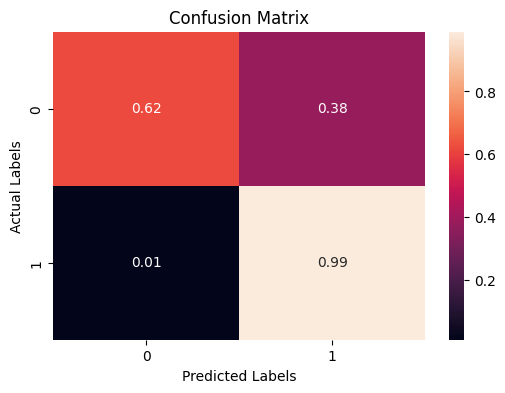

In [147]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [148]:
# Step-5: Test the model on test data
%time svm.fit(X_test_tfidf, y_test) 

CPU times: total: 31.2 ms
Wall time: 66.1 ms


SVC(kernel='linear')

In [149]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = svm.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.9382407985028073
f1_score: 0.9345943310110413
confusion matrix:
 [[ 218   89]
 [  10 1286]]


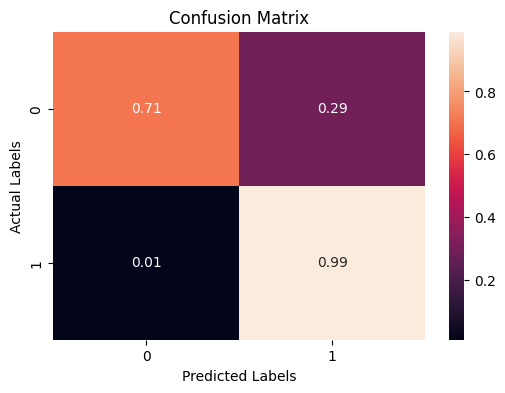

In [150]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Logistic regression Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [151]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lgr = LogisticRegression()

%time lgr.fit(X_train_tfidf, y_train)

CPU times: total: 15.6 ms
Wall time: 41.2 ms


LogisticRegression()

### Step 6 - Evaluating on Train Data

In [152]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = lgr.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8911076443057723
f1_score: 0.8779655795113814
confusion matrix:
 [[ 613  631]
 [  67 5099]]


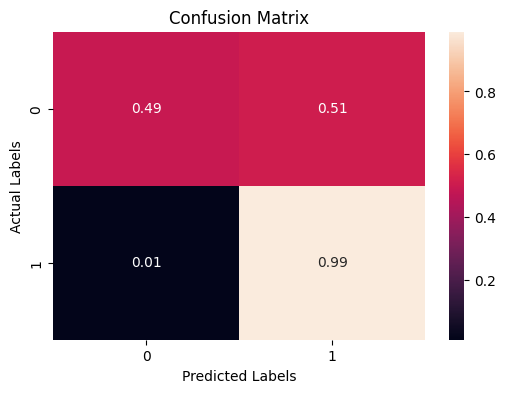

In [153]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [154]:
# Step-5: Test the model on test data
%time lgr.fit(X_test_tfidf, y_test)

CPU times: total: 15.6 ms
Wall time: 13.7 ms


LogisticRegression()

In [155]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = lgr.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8883343730505302
f1_score: 0.8711582099835702
confusion matrix:
 [[ 135  172]
 [   7 1289]]


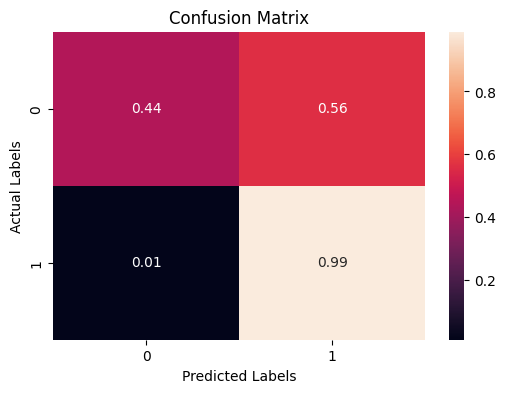

In [156]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Random Forest Model

### Step 5 - Building a Model (i.e. Train the classifier)

In [157]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
random_forest = RandomForestClassifier()

%time random_forest.fit(X_train_tfidf, y_train)

CPU times: total: 1.36 s
Wall time: 3.57 s


RandomForestClassifier()

### Step 6 - Evaluating on Train Data

In [158]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = random_forest.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.955226209048362
f1_score: 0.9537540788508412
confusion matrix:
 [[1004  240]
 [  47 5119]]


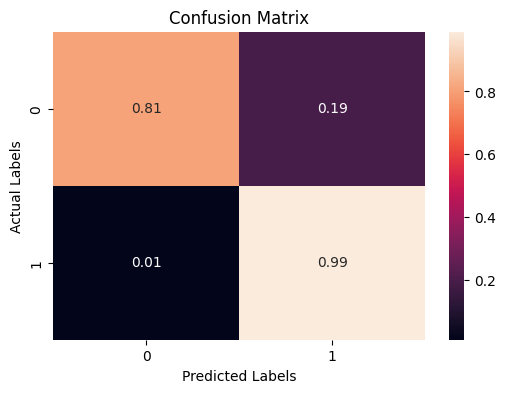

In [159]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()


### Step 7 - Evaluate on Test Data

In [160]:
# Step-5: Test the model on test data
%time random_forest.fit(X_test_tfidf, y_test) 

CPU times: total: 391 ms
Wall time: 618 ms


RandomForestClassifier()

In [161]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = random_forest.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.966313162819713
f1_score: 0.9652941187314359
confusion matrix:
 [[ 258   49]
 [   5 1291]]


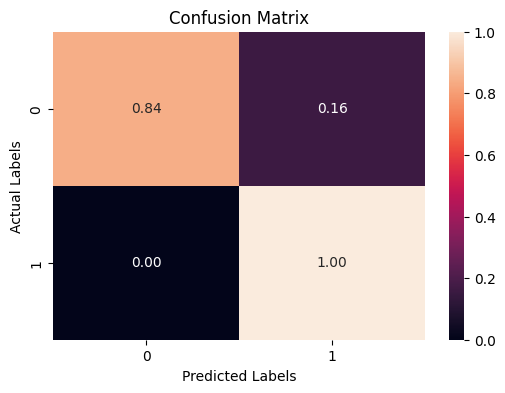

In [162]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## K-Nearest Neighbor model

### Step 5 - Building a Model (i.e. Train the classifier)

In [163]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kneighbors classifier
knn = KNeighborsClassifier()

%time knn.fit(X_train_tfidf, y_train)

CPU times: total: 0 ns
Wall time: 3.03 ms


KNeighborsClassifier()

### Step 6 - Evaluating on Train Data

In [164]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = knn.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)


# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8882995319812792
f1_score: 0.87713132219876
confusion matrix:
 [[ 641  603]
 [ 113 5053]]


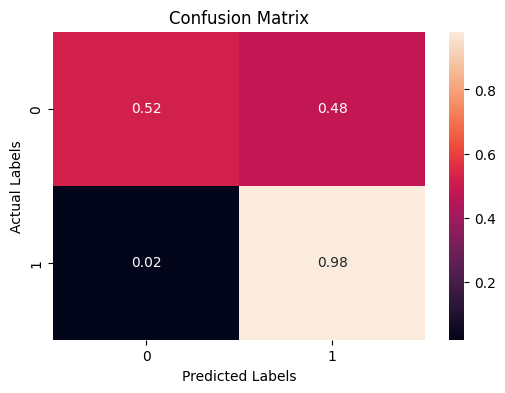

In [165]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

### Step 7 - Evaluate on Test Data

In [166]:
# Step-5: Test the model on test data
%time knn.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 2.36 ms


KNeighborsClassifier()

In [167]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = knn.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.8827199001871491
f1_score: 0.8660753445368536
confusion matrix:
 [[ 135  172]
 [  16 1280]]


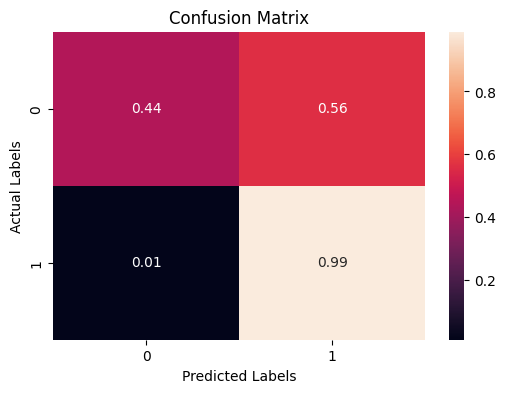

In [168]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [169]:
# Create pickle file  to save trained model of each model
from joblib import dump

# Save the trained model as a .pkl file
dump(nb, 'Pickle/MultinomialNB_model.pkl')

dump(svm, 'Pickle/SVC_model.pkl')

dump(lgr, 'Pickle/Logestic_Reggression_model.pkl')

dump(random_forest, 'Pickle/Random_forest_model.pkl')

dump(knn, 'Pickle/KNeighbors_model.pkl')

# Save the TF-IDF vectorizer as a .pkl file
dump(tfidf_vectorizer, 'Pickle/tfidf_vectorizer.pkl')


['Pickle/tfidf_vectorizer.pkl']

### Based on the highest F1 scores:
#### RandomForestClassifier has highest F1 score i.e
 Train Data:

      Accuracy: 0.955226209048362
      f1_score: 0.9537540788508412
 Test Data:

      Accuracy: 0.966313162819713
      f1_score: 0.9652941187314359

In [170]:
from joblib import load

# Load the Random Forest model from a .pkl file
random_forest_model = load('Pickle/Random_forest_model.pkl')
def predict_sentiment(input_text):
    # Preprocess the input text
    preprocess_text = clean_text(input_text)

    preprocessed_text = lemmatize_text(preprocess_text)

    # Transform the preprocessed text into numerical features
    features = tfidf_vectorizer.transform([preprocessed_text])
    
    # Make prediction using the loaded random forest model
    prediction = random_forest_model.predict(features)[0]
    
    # Convert the prediction to human-readable format
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_text ="nice product"
sentiment = predict_sentiment(input_text)
print("Sentiment:", sentiment)

Sentiment: Positive
